In [7]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.18.5
Pandas: 1.0.5
Matplotlib: 3.2.2
Seaborn: 0.10.1
Scipy: 1.5.0
Sklearn: 0.23.1


In [4]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pwd

'C:\\Users\\Manoj Kumar'

In [30]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv')

In [31]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [32]:
print(data.shape)

(284807, 31)


In [34]:
# Print the shape of the data
data = data.sample(frac=0.5, random_state = 1)
print(data.shape)
print(data.describe())

(71202, 31)
                Time            V1            V2            V3            V4  \
count   71202.000000  71202.000000  71202.000000  71202.000000  71202.000000   
mean    94602.513399      0.002798      0.003297      0.001823      0.005788   
std     47637.163613      1.950367      1.655412      1.509246      1.416705   
min         1.000000    -46.855047    -50.383269    -31.813586     -5.560118   
25%     53882.250000     -0.916708     -0.593731     -0.880655     -0.841844   
50%     84539.000000      0.023983      0.066831      0.176667     -0.012378   
75%    139384.750000      1.315383      0.809644      1.024164      0.748103   
max    172784.000000      2.430507     21.467203      4.069865     13.129143   

                 V5            V6            V7            V8            V9  \
count  71202.000000  71202.000000  71202.000000  71202.000000  71202.000000   
mean       0.001661     -0.000863     -0.006511     -0.004664      0.007452   
std        1.397919      1.338

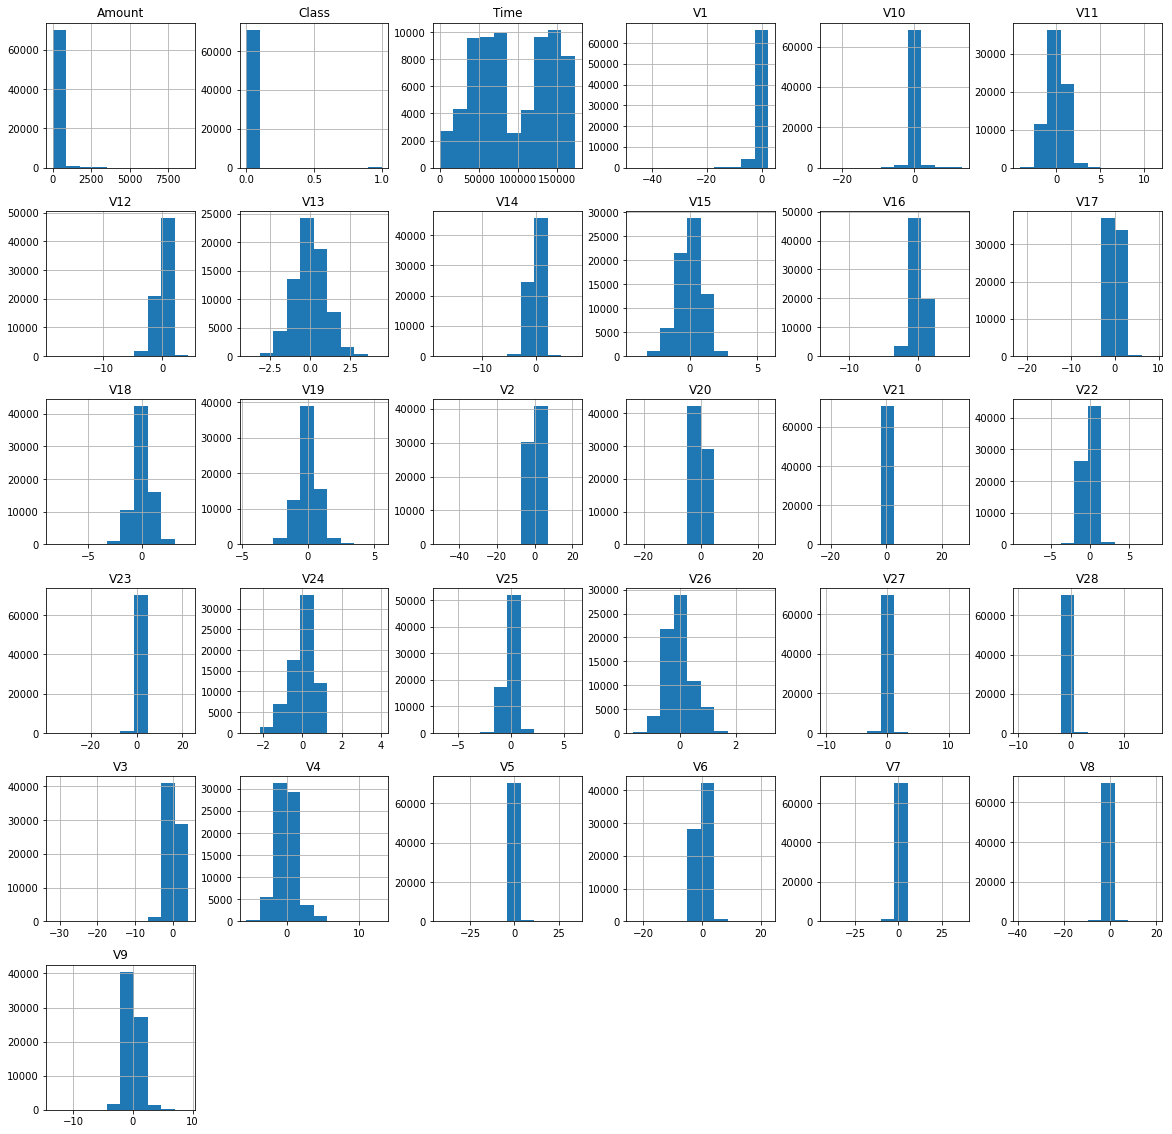

In [35]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

In [36]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.001575467716978478
Fraud Cases: 112
Valid Transactions: 71090


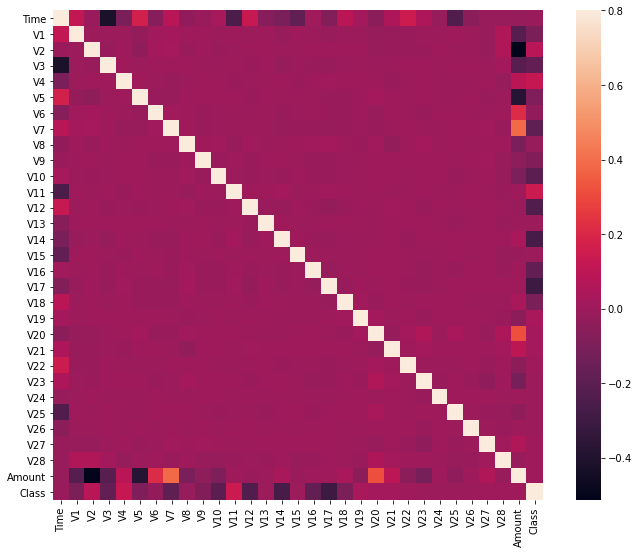

In [37]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [38]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(71202, 30)
(71202,)


In [39]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [40]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 155
0.997823094856886
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       0.31      0.31      0.31       112

    accuracy                           1.00     71202
   macro avg       0.65      0.66      0.66     71202
weighted avg       1.00      1.00      1.00     71202

Local Outlier Factor: 223
0.9968680655037779
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71090
           1       0.01      0.01      0.01       112

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



<Figure size 648x504 with 0 Axes>